In [2]:
from _SBMMatrix import *
from _FigureJiazeHelper import *
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle
from scipy.sparse.linalg import eigs, eigsh
from scipy.linalg import eig
from _CommunityDetect import *
from spectralOperator import BetheHessian
from EXPERIMENT_HYPERGRAPH import *
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [3]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=16)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['lines.markersize'] = 12

%config InlineBackend.figure_format = 'retina'

# Code Test

(479, 479)
# of nodes 50, # of edges 429


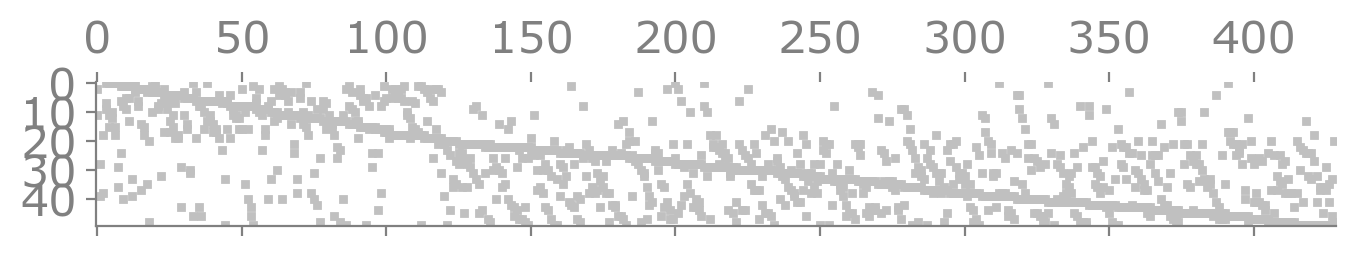

In [20]:
sizes = [20, 30]
ps_dict = {2:[[0.001, 0.001], [0.001, 0.001]], 3:[[[0.01, 0.001], [0.002, 0.001]], [[0.001, 0.001], [0.002, 0.01]]]}
hsbm = HyperSBM(sizes, ps_dict)
print(f'# of nodes {hsbm.n}, # of edges {hsbm.e}')
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.H, markersize=2, rasterized=True, color=gray)

In [21]:
start = time.time()
cd = CommunityDetect(hsbm.bipartite_A)
BHpartition, BHnumgroups = cd.BetheHessian()
true_numberpartition = np.size(sizes)
node_partition = BHpartition[:hsbm.n]
node_numberpartition = np.size(np.unique(node_partition))
Acm, _ = get_confusionmatrix(hsbm.groupId, node_partition, true_numberpartition, node_numberpartition)
ami = adjusted_mutual_info_score(hsbm.groupId, node_partition)
print(f"BH result in A: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(Acm)}) is: \n{Acm}")

number of groups = 4, Kpos=2, Kneg=2
True index is [0 1], Community detected index is [0 1]
BH result in A: 1.0. Time=0.08198809623718262. Confusion Matrix((2, 2)) is: 
[[20.  0.]
 [ 0. 30.]]


In [22]:
print(hsbm.groupId)
print(node_partition)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3]


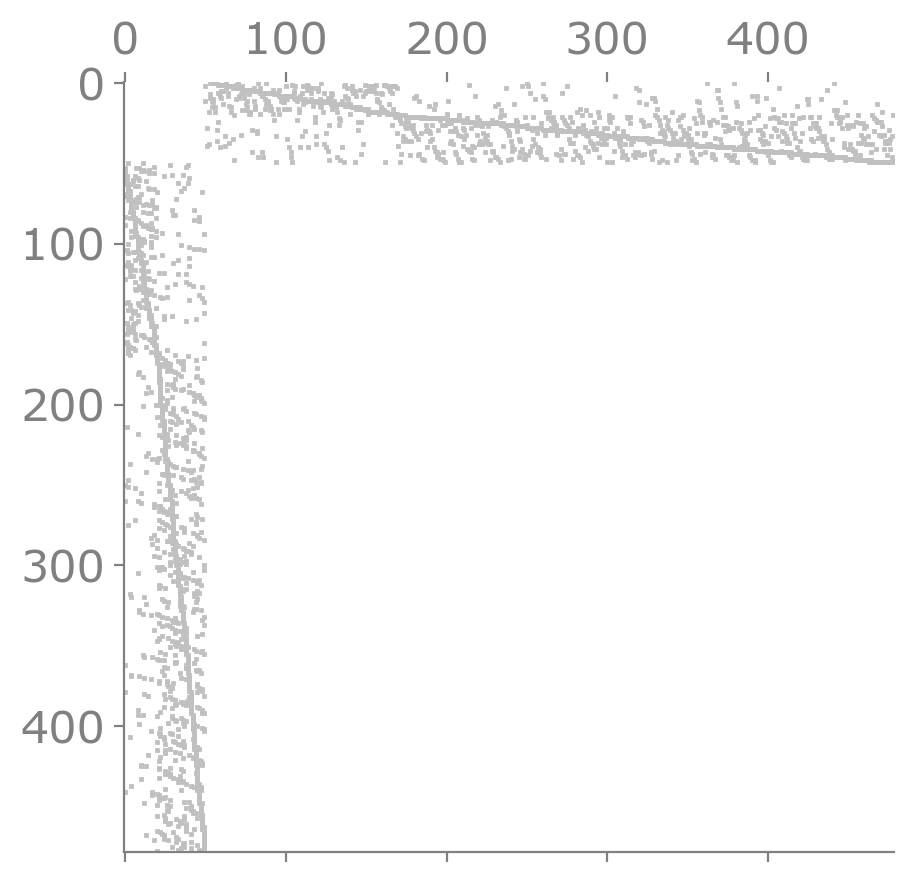

In [24]:
plt.spy(hsbm.bipartite_A, markersize=1, rasterized=True, color=gray)

# EXP on 2-order hsbm(normal graph)

In [25]:
SNRs, A_BHamis, A_BHnumbers, BA_BHamis, BA_BHnumbers = testSSBM(n=1000, q=2, d=10)

(11089, 11089)
SNR=0.1 start. pin=0.011, pout=0.009, hsbm construct time=25.211448669433594
number of groups = 1, Kpos=1, Kneg=0
no indication for grouping -- return all in one partition
True index is [0], Community detected index is [0]
BH result in A: 0.0. Time=0.06891918182373047. Confusion Matrix((2, 1)) is: 
[[500.]
 [500.]]
number of groups = 2, Kpos=1, Kneg=1
True index is [0], Community detected index is [0]
BH result in bipartiteA: 0.0. Time=3.327075958251953. Confusion Matrix((2, 1)) is: 
[[500.]
 [500.]]
(10940, 10940)
SNR=0.2 start. pin=0.011414213562373095, pout=0.008585786437626905, hsbm construct time=25.041391372680664
number of groups = 1, Kpos=1, Kneg=0
no indication for grouping -- return all in one partition
True index is [0], Community detected index is [0]
BH result in A: 0.0. Time=0.07587003707885742. Confusion Matrix((2, 1)) is: 
[[500.]
 [500.]]
number of groups = 2, Kpos=1, Kneg=1
True index is [0], Community detected index is [0]
BH result in bipartiteA: 0.0.

Text(0, 0.5, '#Communities_BHonBA')

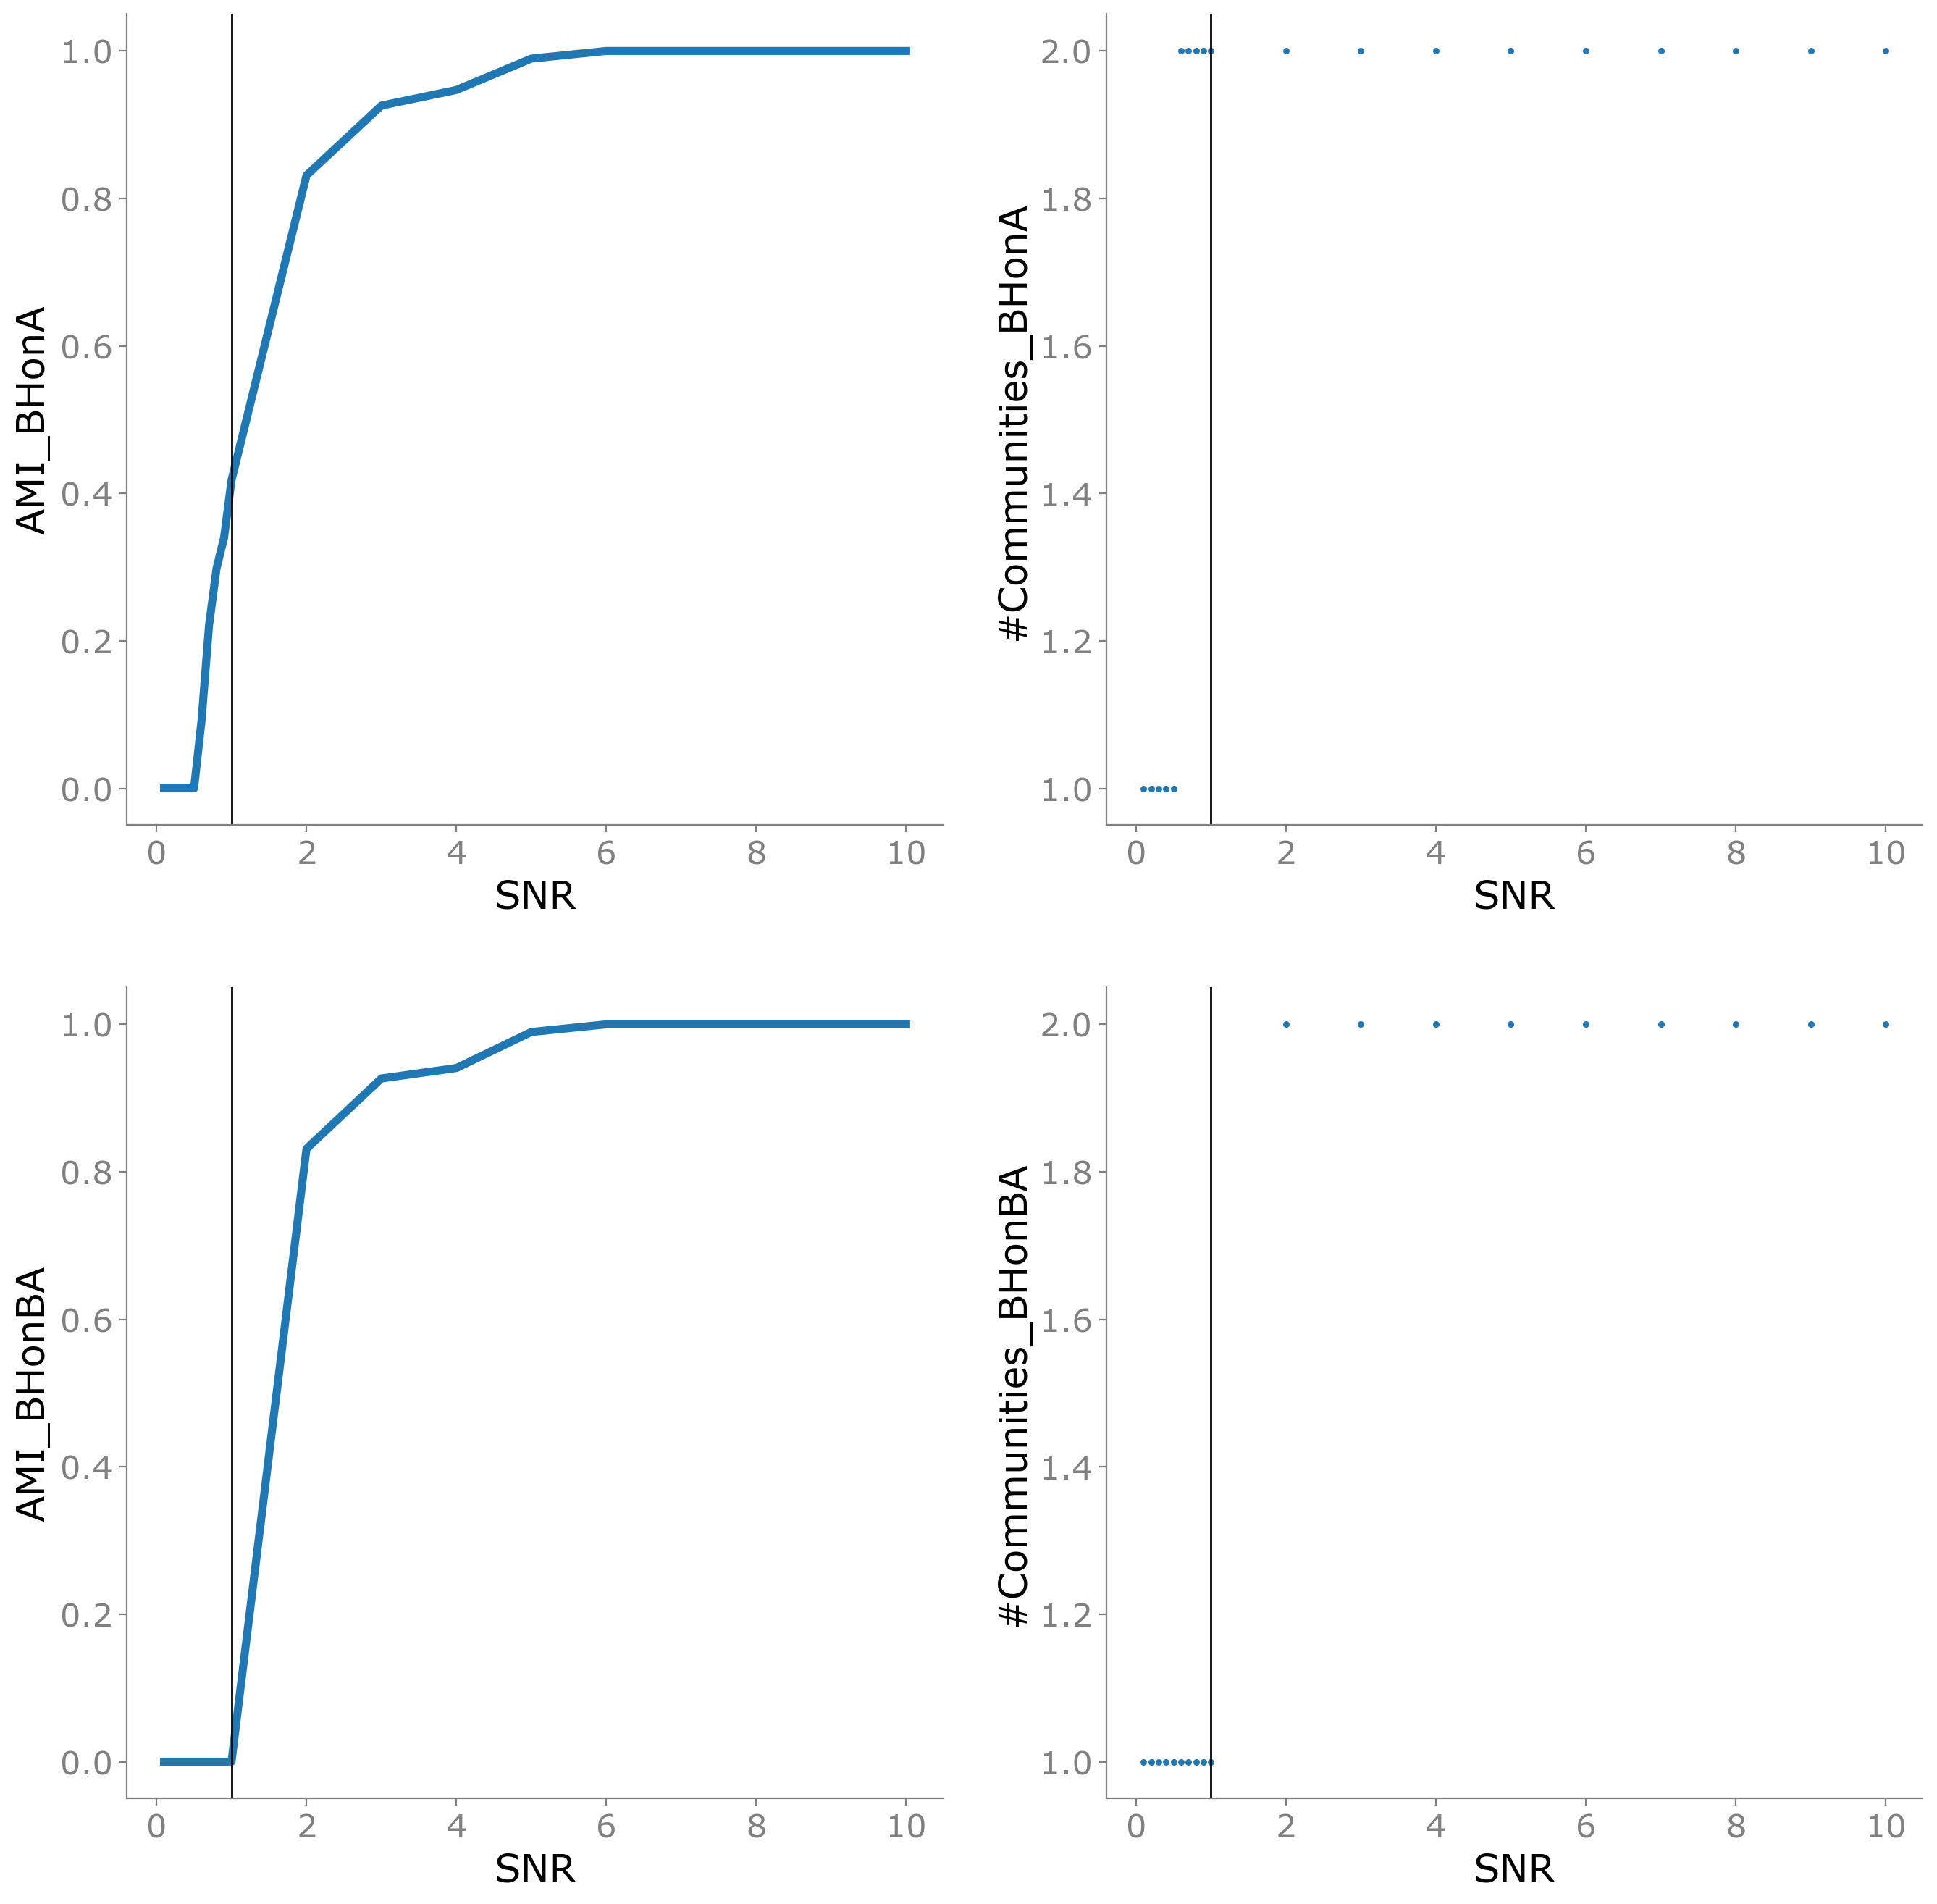

In [34]:
fig = plt.figure(figsize=(16, 16))
widths = [4, 4]
heights = [4, 4]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.plot(SNRs, A_BHamis)
plt.axvline(1, color='k', lw=1)
plt.xlabel("SNR")
plt.ylabel("AMI_BHonA")

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.scatter(SNRs, A_BHnumbers, s=5)
plt.axvline(1, color='k', lw=1)
plt.xlabel("SNR")
plt.ylabel("#Communities_BHonA")

row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.plot(SNRs, BA_BHamis)
plt.axvline(1, color='k', lw=1)
plt.xlabel("SNR")
plt.ylabel("AMI_BHonBA")

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.scatter(SNRs, BA_BHnumbers, s=5)
plt.axvline(1, color='k', lw=1)
plt.xlabel("SNR")
plt.ylabel("#Communities_BHonBA")

In [4]:
n=1000
q=2
d=5
snr = 3
sizes = [int(n / q)] * q
ps_dict = dict({2: None})  # only have 2-order edges
pout = (d - np.sqrt(snr * d)) / n
pin = pout + q * np.sqrt(snr * d) / n
ps_dict[2] = (pin - pout) * np.identity(q) + pout * np.ones((q, q))
hsbm = HyperSBM(sizes, ps_dict)

D:\BackProgram\Anaconda\envs\network\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


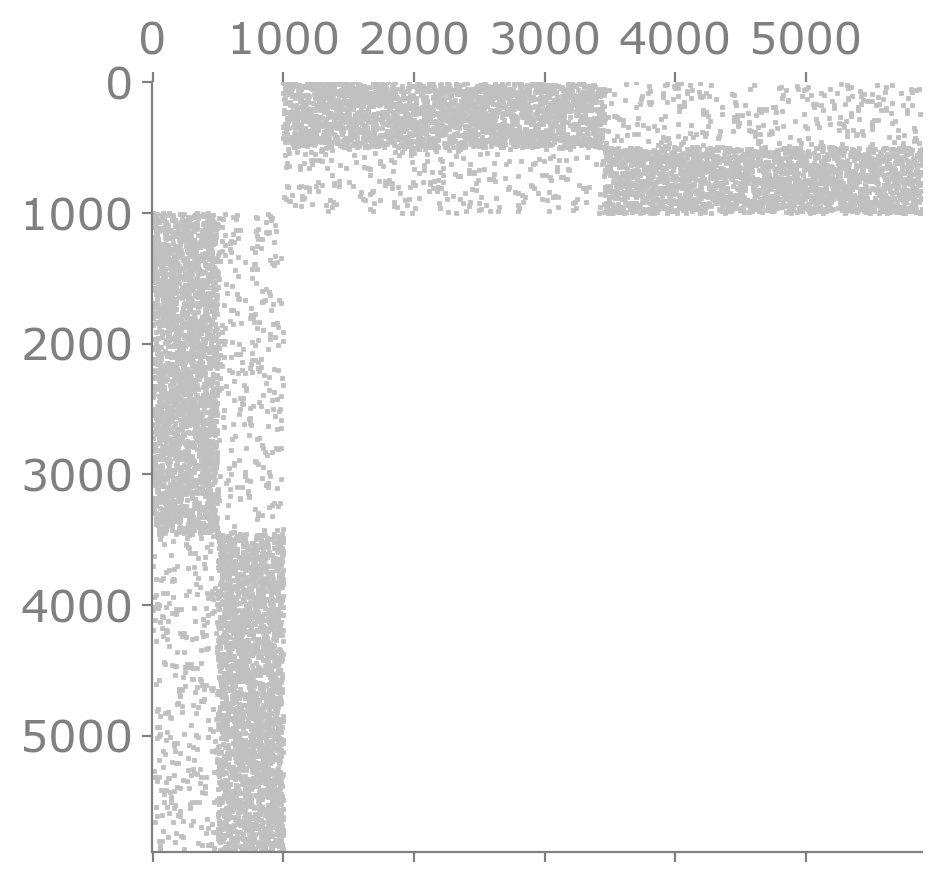

In [5]:
plt.spy(hsbm.bipartite_A, markersize=1, rasterized=True, color=gray)

In [14]:
start = time.time()
A = hsbm.bipartite_A
A_BHpartition, A_BHnumgroups = CommunityDetect(A).BetheHessian()
# ami = adjusted_mutual_info_score(bsbm.groupId[n1:], BTB_BHpartition)
true_numberpartition = 3
true_partition = np.concatenate([np.array(hsbm.groupId), np.array([2] * hsbm.e)])
node_partition = A_BHpartition
node_numberpartition = np.size(np.unique(node_partition))
BTBcm, _ = get_confusionmatrix(true_partition, node_partition, true_numberpartition, node_numberpartition)
print(f"BH result in BTB: . Time={time.time() - start}. Confusion Matrix({np.shape(BTBcm)}) is: \n{BTBcm}")

number of groups = 4, Kpos=2, Kneg=2
True index is [0 1 2], Community detected index is [3 2 0]
BH result in BTB: . Time=1.0561363697052002. Confusion Matrix((3, 4)) is: 
[[4.970e+02 0.000e+00 2.000e+00 1.000e+00]
 [2.000e+00 0.000e+00 4.980e+02 0.000e+00]
 [0.000e+00 2.418e+03 0.000e+00 2.474e+03]]


In [13]:
np.concatenate([np.array(hsbm.groupId), np.array([2] * hsbm.e)])

array([0, 0, 0, ..., 2, 2, 2])